# The dynamics of linear-threshold neural networks

## Introduction

Threshold-linear networks (TLNs) are neural network models that consist of simple neurons which exhibit emergent nonlinear dynamics determined by the network's connectivity. 

***Morrison, K. et al; Fixed Points of Competitive Threshold-Linear Networks. Neural Computation 2019; 31 (1): 94–155.***

TLNs are capable of producing a wide variety of nonlinear dynamics including limit cycles, chaotic behaviour etc.

***Morrison, K. et al. (2016) 'Diversity of emergent dynamics in competitive threshold-linear networks: a preliminary report,' arXiv (Cornell University) [Preprint]. http://export.arxiv.org/pdf/1605.04463.***

This project focuses on analysing TLNs, specifically Combinatorial Threshold Linear Networks (CTLNs) and their diverse dynamic behaviour. A system of ordinary differential equations (ODEs) will be used to model the dynamics of the network. Through the use of the odeint function of the scipy module in Python, the ODEs can be solved. The solved solution can then be visualised.

It will also be investigated how varying initial conditions and parameters impact dynamic behaviour

This project will observe the dynamics of a two different 3-neuron CTLN networks and an 8-neuron CTLN network

## Equations 

$$
\frac{dx_i}{dt} = -x_i + \left[\sum_{j=1}^{n} W_{ij}x_j + \theta \right]_+, i = 1,...,n
$$

**equation 1**

The dynamics of Threshold Linear Networks (TLNs) are governed by the system of ODEs described by equation 1. The change in a neurons activity level/firing rate is determined by its current state, inputs from other neurons and the constant $\theta$. 

$\frac{dx_i}{dt}$: Rate of change of activity level/firing rate of the $i$-th neuron over time

$-x_i$: A dynamic variable representing the activity level/firing rate of the $i$-th neuron. This is negative to show the leakage in activity level/firing rate

$\sum_{j=1}^{n} W_{ij}x_j $: Incoming activation to neuron $i$ from all other neurons $j$ in the network. Matrix $ W_{ij}$ contains the weights representing the connectivity of the network whose entries are the directed connection strengths between node pairs.

$\theta$: A constant input

$[]_+$: Threshold nonlinearity sets all negative values to zero. Crucial to produce non-linear dynamics and ensuring that the activity level/firing rate does not go below 0

***Morrison, K. et al. (2016) 'Diversity of emergent dynamics in competitive threshold-linear networks: a preliminary report,' arXiv (Cornell University) [Preprint]. http://export.arxiv.org/pdf/1605.04463.***

CTLNs are a unique case of TLNs where the following apply to $W_{ij}$ and the parameters $\epsilon$, $\delta$, $\theta$ for a directed graph $G$:

$$W_{ij} = 
\begin{cases} 
0 & \text{if } i = j \\
-1 + \epsilon & \text{if } i \leftarrow j \text{ in } G \\
-1 - \delta & \text{if } i \nleftarrow j \text{ in } G
\end{cases}$$


where $i \leftarrow j$ indicates a link from $j$ to $i$ and $i \nleftarrow j$ indicates no link from $j$ to $i$


Additionally the following inequality must be satisfied:

$$\delta > 0, \quad 0 \leq \epsilon < \frac{\delta}{\delta + 1}, \quad \theta > 0$$

When this is satisfied, the parameters are said to be in 'legal range'

***Morrison, K. and Curto, C. (2019) 'Predicting neural network dynamics via graphical analysis,' in Algebraic and Combinatorial Computational
Biology, pp. 241–277. https://doi.org/10.1016/b978-0-12-814066-6.00008-8***

In [3]:
# import the relevant libraries

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx
import random

## 3-neuron neural network 1 of 2

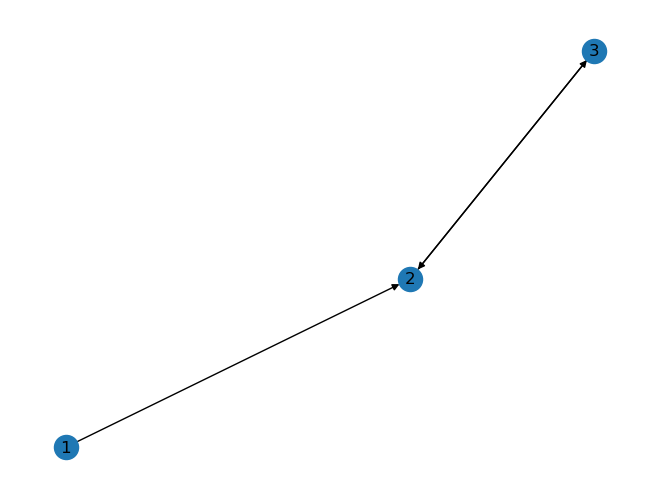

In [4]:
# Create an empty directed graph structure
G = nx.DiGraph()

# Adds multiple node to the graph G. We have a list containing 3 nodes i.e. nodes 1, 2 and 3 to be added to graph G
G.add_nodes_from([1, 2, 3])

# Adds edges betweeen nodes in the graph where directed edges from one node to the other are specified as a list of tuples
G.add_edges_from([(1, 2), (2, 3), (3, 2)])

# Prodcues a visual of graph G where the with_labels parameter is specified as True so the nodes seen as labelled
nx.draw(G, with_labels=True)

In [22]:
adj = np.array([[0, 0, 0],     
              [1, 0, 1], 
              [0, 1, 0]])  

print('adjacency matrix:')
print(adj)

adjacency matrix:
[[0 0 0]
 [1 0 1]
 [0 1 0]]


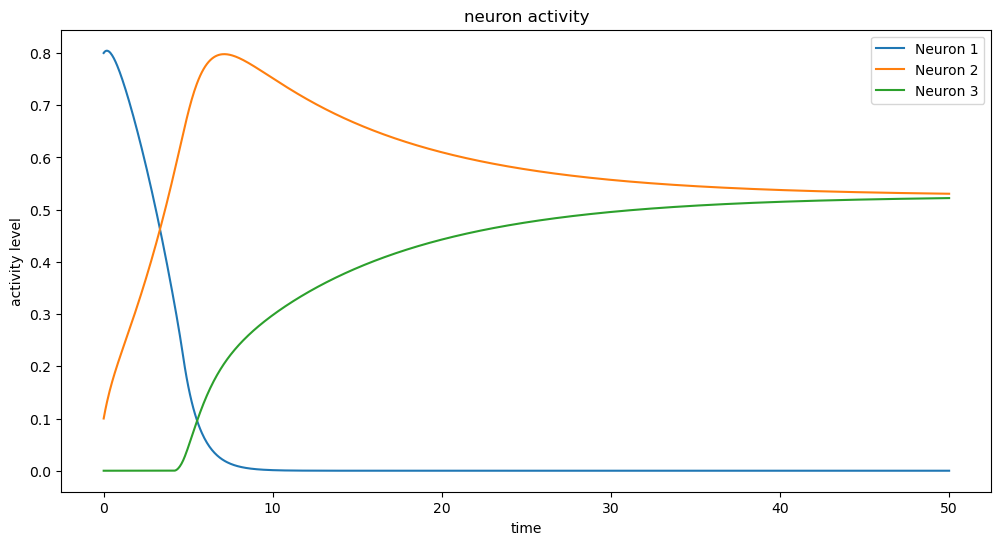

In [13]:
def dynamics(x, t, W, theta):
    """
    Computes the derivative of the vector of the dynamic variables, x, at timestep t
    
    Parameters
    ----------
    x: A vector of all dynamic variables at timestep t. Each dynamic variable represents the activity levels/firing rates 
    for a specific neuron within the network
    t: Current timestep
    W: The weight matrix representing the connectivity of the network
    theta: Constant applied to each neuron
    
    Returns
    ----------
    x_dot: The derivative of the vector of the dynamic variables, x at timestep t
    
    """
    
    # The code below models equation 1 described in the equation section of this notebook, representing the system of ODEs
    # in vector form. The threshold nonlinearity has been applied through the use of the np.maximum() function
    
    x_dot = -x + np.maximum(np.dot(W, x) + theta, 0)
    return x_dot

# Parameters theta, epsilon and delta. These have been chosen such to satisfy the inequality stated in the equations section
theta = 1
delta = 0.5
epsilon = 0.1 

# The weights matrix describing the connectivity of the network.
W = np.array([[0, -1 - delta, -1 - delta],     # neuron 1
              [-1 + epsilon, 0, -1 + epsilon], # neuron 2
              [-1 - delta, -1 + epsilon, 0]])  # neuron 3


# Defines the Initial Conditions
x0 = [0.8, 0.1, 0]


# Creates an array of evenly spaced timesteps. Can be interpreted as seconds.
time = np.linspace(0, 50, 1000)

# Solves the system of ODEs given by the dynamics function
solution = odeint(dynamics, x0, time, args=(W, theta))

# Plots the solutions
plt.figure(figsize=(12, 6))
plt.plot(time, solution[:, 0], label='Neuron 1')
plt.plot(time, solution[:, 1], label='Neuron 2')
plt.plot(time, solution[:, 2], label='Neuron 3')
plt.xlabel('time')
plt.ylabel('activity level')
plt.title('neuron activity')
plt.legend()
plt.show()

The above visualisation showcases the dynamics of the 3-neuron CTLN network defined above.

The three plots show the activity level for each neuron. It can be seen within the first 5 seconds that as the activity level of Neuron 1 decays, the activity level of Neuron 2 increases. Beyond this, the activity level for neuron 1 remains at 0. Neuron 2 and Neuron 3 exhibit transient behaviour, going from ther respective steady stationary points to a stationary point at activity level of 0.55, where there is negligible change over time, highlighting a steady state has been reached.

## 3-neuron neural network 2 of 2

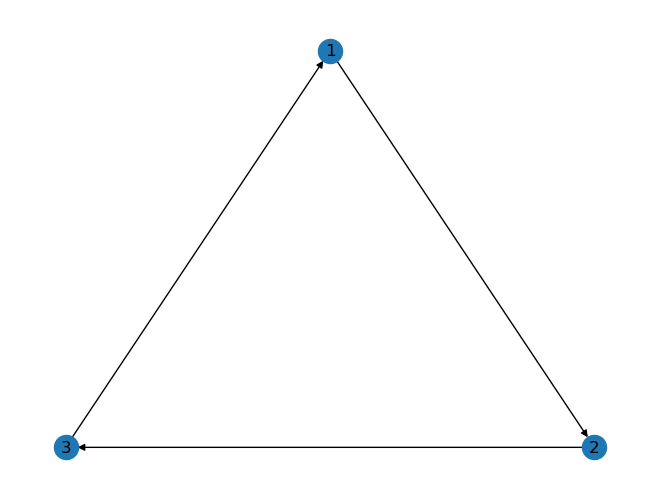

In [26]:
# Create an empty directed graph structure
G = nx.DiGraph()

# Adds multiple node to the graph G. We have a list containing 3 nodes i.e. nodes 1, 2 and 3 to be added to graph G
G.add_nodes_from([1, 2, 3])

# Adds edges betweeen nodes in the graph where directed edges from one node to the other are specified as a list of tuples
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

# defines the position of each node
position = {1: (2, 1), 2: (3, 0), 3: (1, 0)}

# Prodcues a visual of graph G where the with_labels parameter is specified as True so the nodes seen as labelled
nx.draw(G, position, with_labels=True)


In [23]:
adj = np.array([[0, 0, 1],     
              [1, 0, 0], 
              [0, 1, 0]])  

print('adjacency matrix:')
print(adj)

adjacency matrix:
[[0 0 1]
 [1 0 0]
 [0 1 0]]


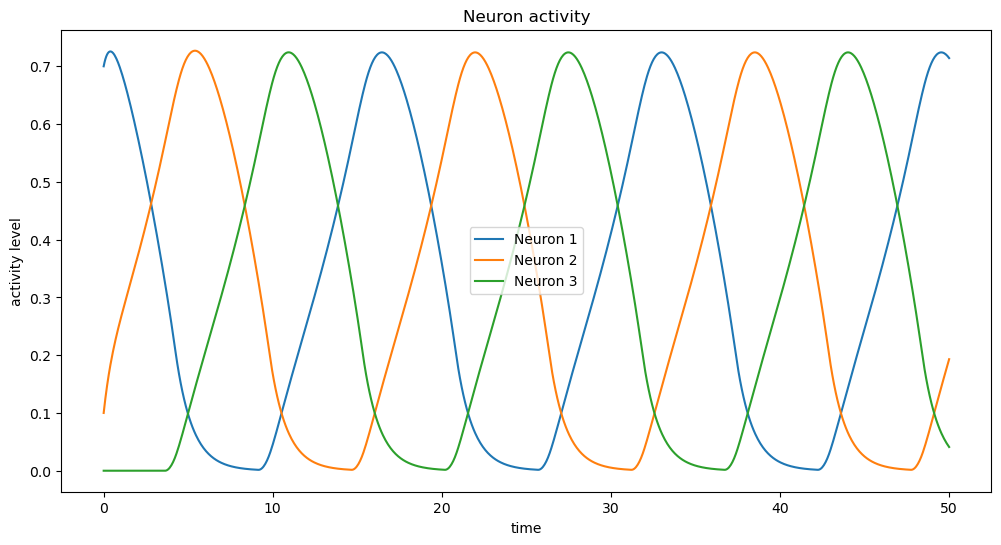

In [55]:
def dynamics(x, t, W, theta):
    """
    Computes the derivative of the vector of the dynamic variables, x, at timestep t
    
    Parameters
    ----------
    x: A vector of all dynamic variables at timestep t. Each dynamic variable represents the activity levels/firing rates 
    for a specific neuron within the network
    t: Current timestep
    W: The weight matrix representing the connectivity of the network
    theta: Constant applied to each neuron
    
    Returns
    ----------
    x_dot: The derivative of the vector of the dynamic variables, x at timestep t
    
    """
    
    # The code below models equation 1 described in the equation section of this notebook, representing the system of ODEs
    # in vector form. The threshold nonlinearity has been applied through the use of the np.maximum() function
    
    x_dot = -x + np.maximum(np.dot(W, x) + theta, 0)
    return x_dot

# Parameters theta, epsilon and delta. These have been chosen such to satisfy the inequality stated in the equations section
theta = 1
delta = 0.5
epsilon = 0.1 

# The weights matrix describing the connectivity of the network.
W = np.array([[0, -1 - delta, -1 + epsilon], # neuron 1
              [-1 + epsilon, 0, -1 - delta], # neuron 2
              [-1 - delta, -1 + epsilon, 0]])# neuron 3


# Defines the Initial Conditions
x0 = [0.7, 0.1, 0]


# Creates an array of evenly spaced timesteps. Can be interpreted as seconds.
time = np.linspace(0, 50, 1000)

# Solves the system of ODEs given by the dynamics function
solution = odeint(dynamics, x0, time, args=(W, theta))

# Plots the solutions
plt.figure(figsize=(12, 6))
plt.plot(time, solution[:, 0], label='Neuron 1')
plt.plot(time, solution[:, 1], label='Neuron 2')
plt.plot(time, solution[:, 2], label='Neuron 3')
plt.xlabel('time')
plt.ylabel('activity level')
plt.title('Neuron activity')
plt.legend()
plt.show()

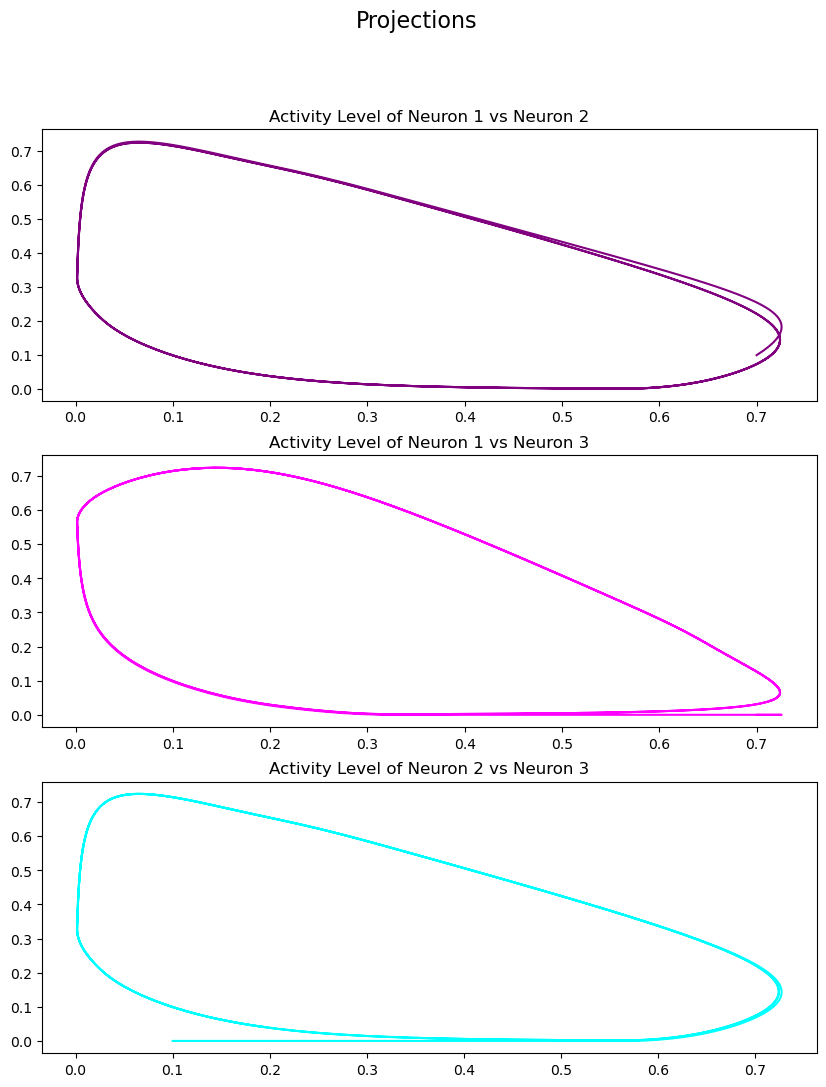

In [56]:
# plotting all 3 projections in 3 Subplots

fig, axs = plt.subplots(3, figsize=(10, 12))
fig.suptitle('Projections', fontsize=16)

axs[0].plot(solution[:, 0], solution[:, 1], color='purple')
axs[0].set_title('Activity Level of Neuron 1 vs Neuron 2')

axs[1].plot(solution[:, 0], solution[:, 2], color='magenta')
axs[1].set_title('Activity Level of Neuron 1 vs Neuron 3')

axs[2].plot(solution[:, 1], solution[:, 2], color='cyan')
axs[2].set_title('Activity Level of Neuron 2 vs Neuron 3')

plt.show()

The above visualisation showcases the dynamics of the 3-neuron CTLN network defined above.

The first visualisation shows the activity activity levels for each neuron. Periodic bhaviour can be observed for each neuron where each neurons activity level shows peaks and troughs at regular intervals where each complete cycle (i.e. peak to trough to peak) lasts for approximately 17 seconds.  This is indicative of the nonlinear dynamic phenomena of a limit cycle.

The activity levels are sequential in that the neurons take turns firing successively. As the activity level of Neuron 1 decays, the activity level of Neuron 2 increases. Similarly, as the activity level of Neuron 2 decays, the activity level of Neuron 3 increases and as the the activity level of Neuron 3 decays, the activity level of Neuron 1 increases. This behaviour continues indefinitely.

The dynamics show the activity levels for all neurons is bounded between 0 and 0.73, oscillating between these values. There is no dampening or growth in the amplitude of the activity levels highlighting a stable limit cycle.

The second visualisation shows different 2d projections of the neuron solutions. It can be observed that each individual plot in this visualisation resembles a loop like shape. This is also characteristic of a limit cycle.

### <u>Impact of parameters and initial conditions on dynamics</u>

Using the same 3-neuron CTLN network, it will be investigated how varying individual parameters (i.e. $\delta, \epsilon, \theta$) and initial conditions while holding other parameters constant impact the dynamics of the network

 <u>Impact of initial conditions on dynamics</u>

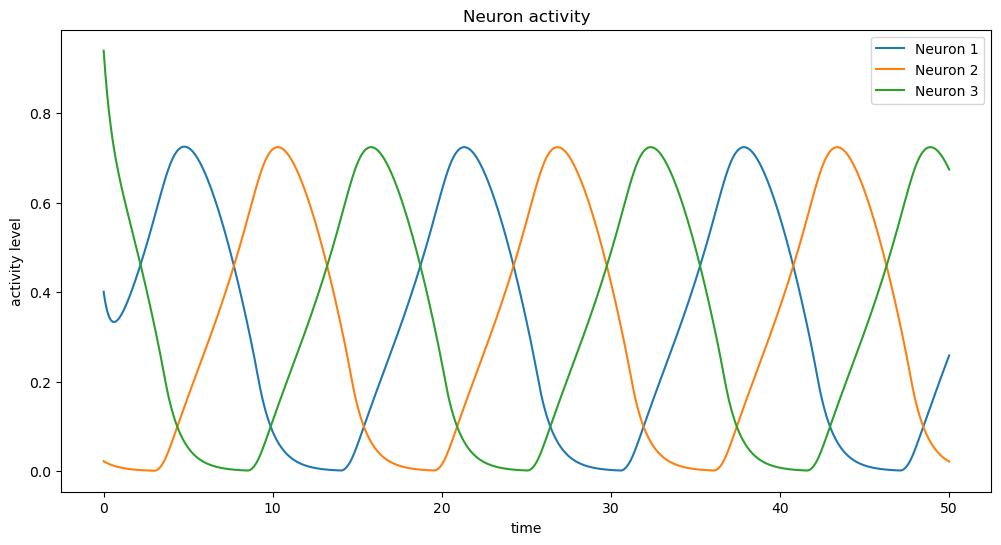

Initial Conditions:  [0.40094509320978045, 0.022158945342770853, 0.9394769312009243]


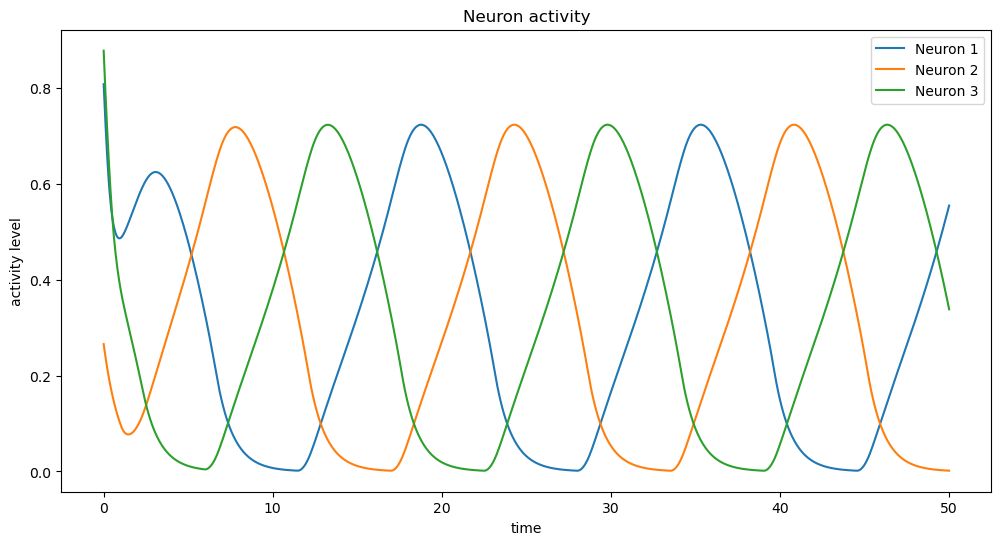

Initial Conditions:  [0.8087355671684379, 0.26603003022909133, 0.87856657998055]


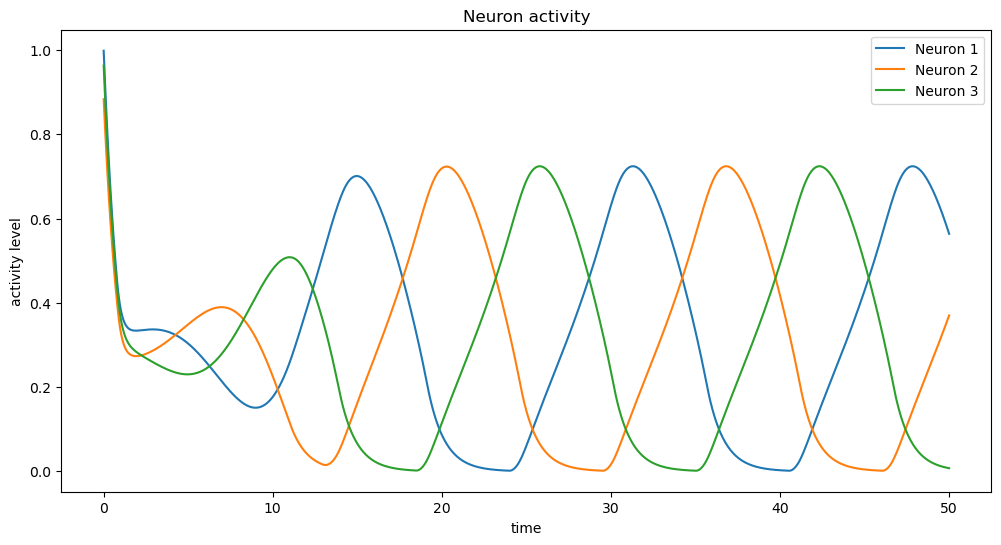

Initial Conditions:  [0.9981330593381896, 0.8830500418860198, 0.9628946617674337]


In [14]:
def dynamics(x, t, W, theta):
    """
    Computes the derivative of the vector of the dynamic variables, x, at timestep t
    
    Parameters
    ----------
    x: A vector of all dynamic variables at timestep t. Each dynamic variable represents the activity levels/firing rates 
    for a specific neuron within the network
    t: Current timestep
    W: The weight matrix representing the connectivity of the network
    theta: Constant applied to each neuron
    
    Returns
    ----------
    x_dot: The derivative of the vector of the dynamic variables, x at timestep t
    
    """
    
    # The code below models equation 1 described in the equation section of this notebook, representing the system of ODEs
    # in vector form. The threshold nonlinearity has been applied through the use of the np.maximum() function
    
    x_dot = -x + np.maximum(np.dot(W, x) + theta, 0)
    return x_dot

# Parameters theta, epsilon and delta. These have been chosen such to satisfy the inequality stated in the equations section
theta = 1
delta = 0.5
epsilon = 0.1 

# The weights matrix describing the connectivity of the network.
W = np.array([[0, -1 - delta, -1 + epsilon], # neuron 1
              [-1 + epsilon, 0, -1 - delta], # neuron 2
              [-1 - delta, -1 + epsilon, 0]])# neuron 3



for i in range(3):
    # Defines the Initial Conditions. These will be random values
    x0 = [random.random(), random.random(), random.random()]
    # Creates an array of evenly spaced timesteps. Can be interpreted as seconds.
    time = np.linspace(0, 50, 1000)

    # Solves the system of ODEs given by the dynamics function
    solution = odeint(dynamics, x0, time, args=(W, theta))

    # Plots the solutions
    plt.figure(figsize=(12, 6))
    plt.plot(time, solution[:, 0], label='Neuron 1')
    plt.plot(time, solution[:, 1], label='Neuron 2')
    plt.plot(time, solution[:, 2], label='Neuron 3')
    plt.xlabel('time')
    plt.ylabel('activity level')
    plt.title('Neuron activity')
    plt.legend()
    plt.show()
    print('Initial Conditions: ', x0)

It can be seen that regardless of any neurons initial conditions, the activities for all neurons settle into a limit cycle. This is indicative of the network being a global attractor.

neurons with higher initial activity are at the the peaks of their cycle showing greater amplitude than those with lower levels which are at the troughs of their cycles

It can be seen that the initial conditions dictate how quickly the limit cycle is reached. For example, by observing when the first peak occurs of the stable limit cycle, the first plot shows a stable limit cycle is reached at 5 seconds, the second plot at 9 seconds and the third plot at 15 seconds.

The network seems to be robust given its eventual stability despite varying initial conditions

 <u>Impact of $\theta$ on dynamics</u>

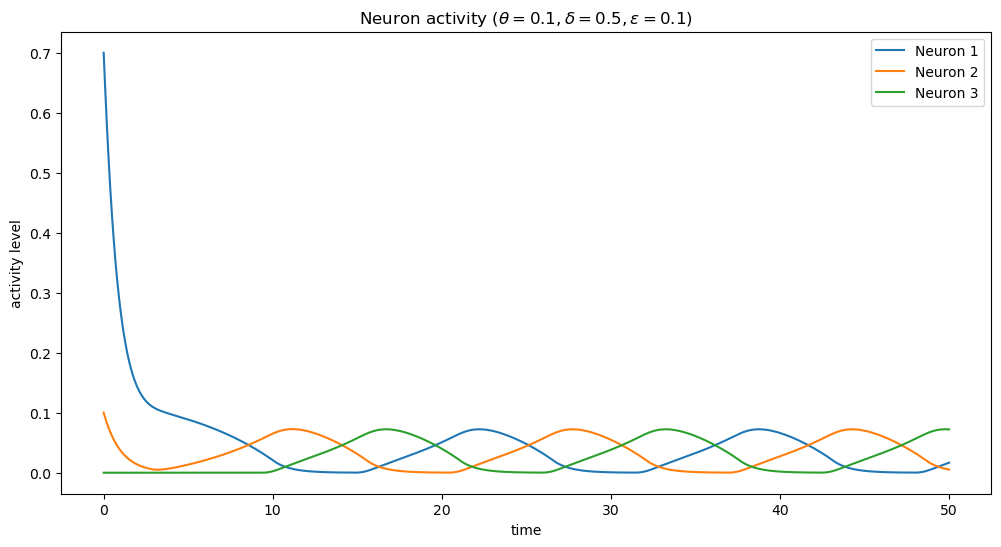

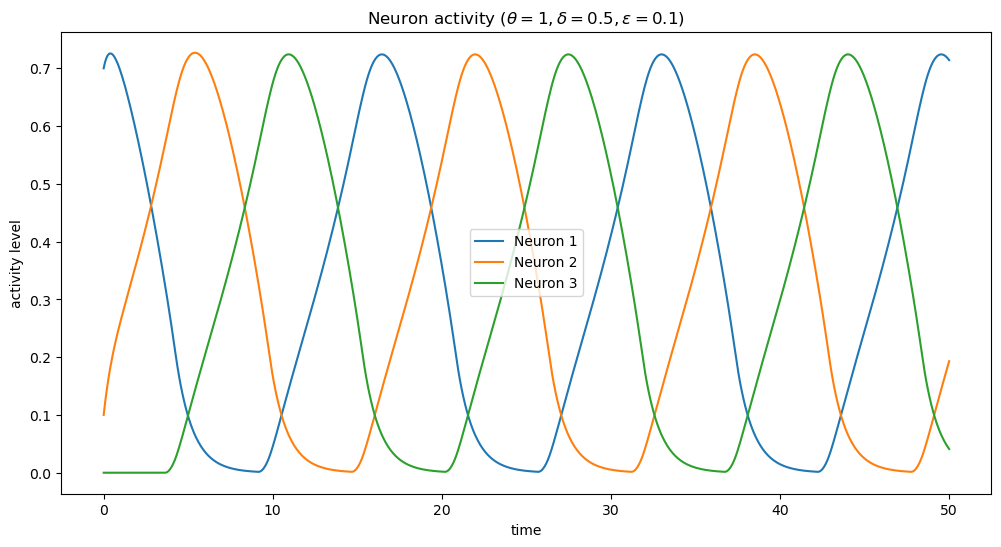

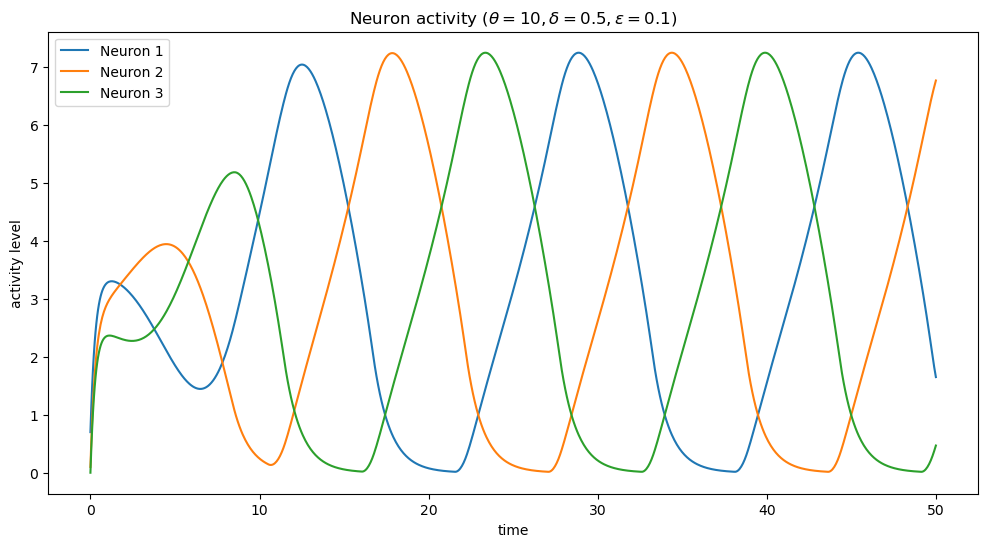

In [32]:
def dynamics(x, t, W, theta):
    """
    Computes the derivative of the vector of the dynamic variables, x, at timestep t
    
    Parameters
    ----------
    x: A vector of all dynamic variables at timestep t. Each dynamic variable represents the activity levels/firing rates 
    for a specific neuron within the network
    t: Current timestep
    W: The weight matrix representing the connectivity of the network
    theta: Constant applied to each neuron
    
    Returns
    ----------
    x_dot: The derivative of the vector of the dynamic variables, x at timestep t
    
    """
    
    # The code below models equation 1 described in the equation section of this notebook, representing the system of ODEs
    # in vector form. The threshold nonlinearity has been applied through the use of the np.maximum() function
    
    x_dot = -x + np.maximum(np.dot(W, x) + theta, 0)
    return x_dot

# Parameters theta, epsilon and delta. These have been chosen such to satisfy the inequality stated in the equations section
theta = [0.1, 1, 10]
delta = 0.5
epsilon = 0.1 


# The weights matrix describing the connectivity of the network.
W = np.array([[0, -1 - delta, -1 + epsilon], # neuron 1
              [-1 + epsilon, 0, -1 - delta], # neuron 2
              [-1 - delta, -1 + epsilon, 0]])# neuron 3


# Defines the Initial Conditions
x0 = [0.7, 0.1, 0]


# Creates an array of evenly spaced timesteps. Can be interpreted as seconds.
time = np.linspace(0, 50, 1000)



# Plots the solutions
for i in theta:
    solution = odeint(dynamics, x0, time, args=(W, i))
    plt.figure(figsize=(12, 6))
    plt.plot(time, solution[:, 0], label='Neuron 1')
    plt.plot(time, solution[:, 1], label='Neuron 2')
    plt.plot(time, solution[:, 2], label='Neuron 3')
    plt.xlabel('time')
    plt.ylabel('activity level')
    plt.title(r"Neuron activity ($\theta = {}, \delta = {}, \epsilon = {}$)".format(i, delta, epsilon), fontsize=12)
    plt.legend()
    plt.show()

It can be observed that as $\theta$ increases, the amplitude of the activity level cycles for each neuron increases. The value $\theta$, which acts as an external drive to each neuron. Therefore as $\theta$ increases, the neurons fire at higher activity levels which can be seen in the above plots.

 <u>Impact of $\delta$ on dynamics</u>

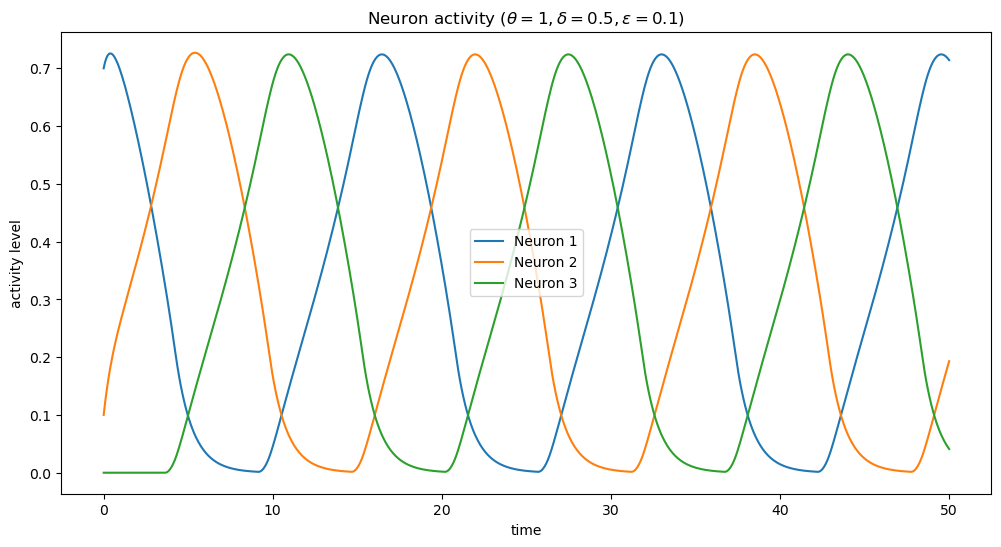

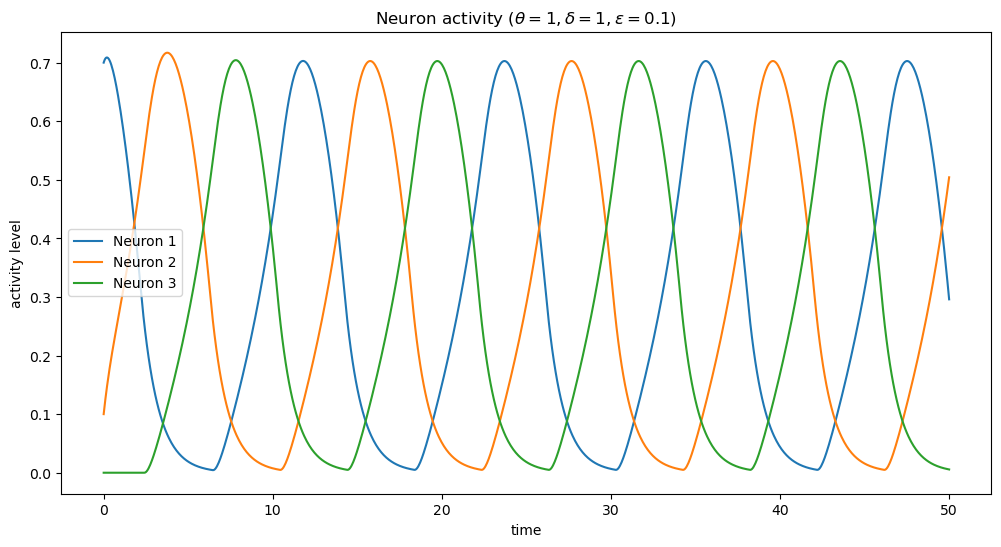

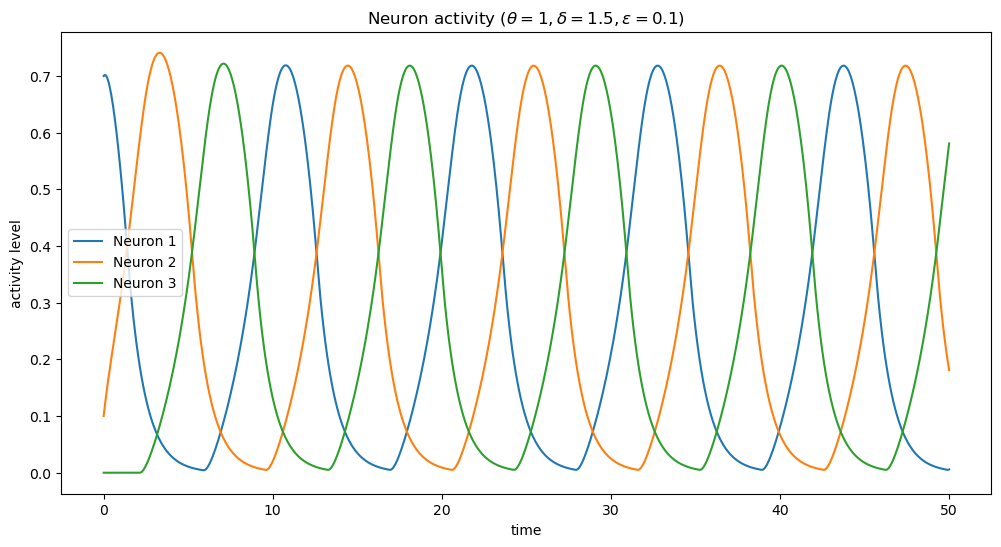

In [15]:
def dynamics(x, t, W, theta):
    """
    Computes the derivative of the vector of the dynamic variables, x, at timestep t
    
    Parameters
    ----------
    x: A vector of all dynamic variables at timestep t. Each dynamic variable represents the activity levels/firing rates 
    for a specific neuron within the network
    t: Current timestep
    W: The weight matrix representing the connectivity of the network
    theta: Constant applied to each neuron
    
    Returns
    ----------
    x_dot: The derivative of the vector of the dynamic variables, x at timestep t
    
    """
    
    # The code below models equation 1 described in the equation section of this notebook, representing the system of ODEs
    # in vector form. The threshold nonlinearity has been applied through the use of the np.maximum() function
    
    x_dot = -x + np.maximum(np.dot(W, x) + theta, 0)
    return x_dot

# Parameters theta, epsilon and delta. These have been chosen such to satisfy the inequality stated in the equations section
theta = 1
delta_values = [0.5, 1, 1.5]
epsilon = 0.1


for i in delta_values:
    
    # The weights matrix describing the connectivity of the network.
    W = np.array([[0, -1 - i, -1 + epsilon], # neuron 1
              [-1 + epsilon, 0, -1 - i],     # neuron 2
              [-1 - i, -1 + epsilon, 0]])    # neuron 3

    # Defines the Initial Conditions
    x0 = [0.7, 0.1, 0]


    # Creates an array of evenly spaced timesteps. Can be interpreted as seconds.
    time = np.linspace(0, 50, 1000)

    # Solves the system of ODEs given by the dynamics function
    solution = odeint(dynamics, x0, time, args=(W, theta))

    # Plots the solutions
    plt.figure(figsize=(12, 6))
    plt.plot(time, solution[:, 0], label='Neuron 1')
    plt.plot(time, solution[:, 1], label='Neuron 2')
    plt.plot(time, solution[:, 2], label='Neuron 3')
    plt.xlabel('time')
    plt.ylabel('activity level')
    plt.title(r"Neuron activity ($\theta = {}, \delta = {}, \epsilon = {}$)".format(theta, i, epsilon), fontsize=12)
    plt.legend()
    plt.show()

The rates of increase and decay of activity level are greater in magnitude as $\delta$ increases leading to increased frequency of cycles.

 <u>Impact of $\epsilon$ on dynamics</u>

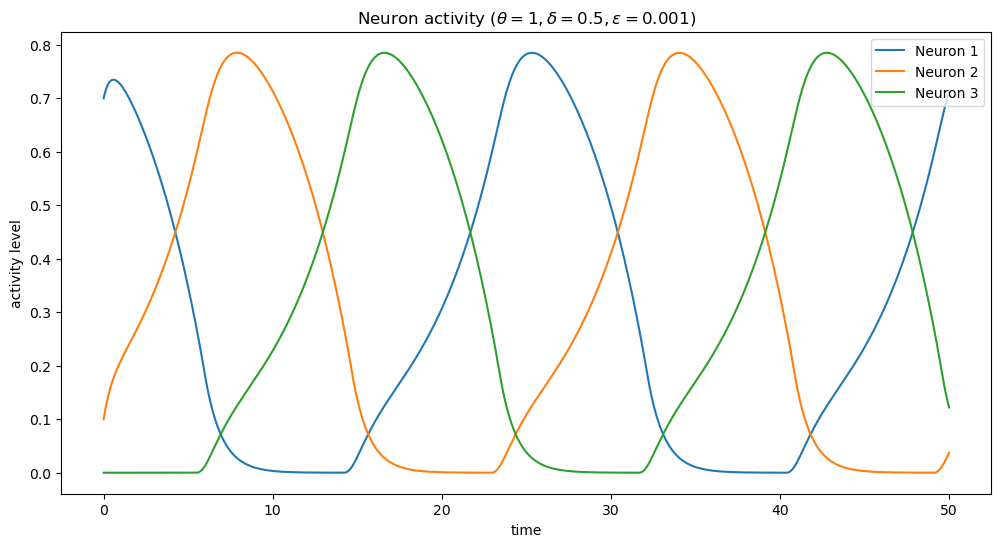

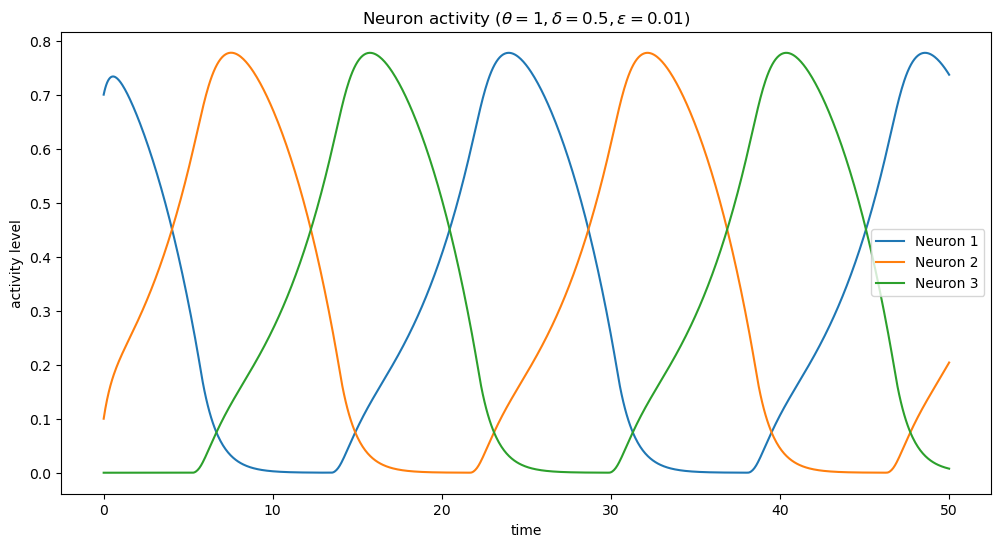

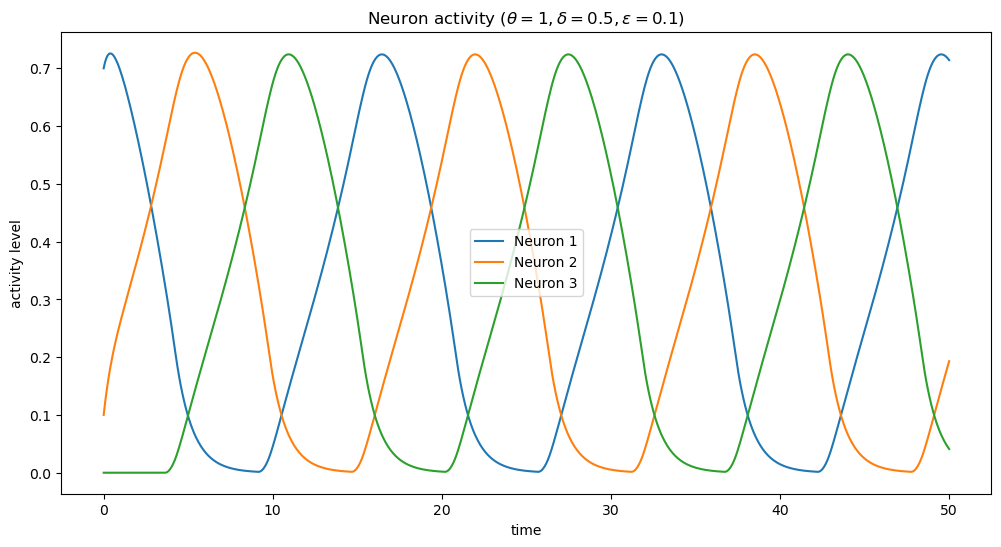

In [16]:
def dynamics(x, t, W, theta):
    """
    Computes the derivative of the vector of the dynamic variables, x, at timestep t
    
    Parameters
    ----------
    x: A vector of all dynamic variables at timestep t. Each dynamic variable represents the activity levels/firing rates 
    for a specific neuron within the network
    t: Current timestep
    W: The weight matrix representing the connectivity of the network
    theta: Constant applied to each neuron
    
    Returns
    ----------
    x_dot: The derivative of the vector of the dynamic variables, x at timestep t
    
    """
    
    # The code below models equation 1 described in the equation section of this notebook, representing the system of ODEs
    # in vector form. The threshold nonlinearity has been applied through the use of the np.maximum() function
    
    x_dot = -x + np.maximum(np.dot(W, x) + theta, 0)
    return x_dot

# Parameters theta, epsilon and delta. These have been chosen such to satisfy the inequality stated in the equations section
theta = 1
epsilon_values = [0.001, 0.01, 0.1] 
delta = 0.5


for i in epsilon_values:
    # The weights matrix describing the connectivity of the network.
    W = np.array([[0, -1 - delta, -1 + i], # neuron 1
                  [-1 + i, 0, -1 - delta], # neuron 2
                  [-1 - delta, -1 + i, 0]])# neuron 3


    # Defines the Initial Conditions
    x0 = [0.7, 0.1, 0]


    # Creates an array of evenly spaced timesteps. Can be interpreted as seconds.
    time = np.linspace(0, 50, 1000)

    # Solves the system of ODEs given by the dynamics function
    solution = odeint(dynamics, x0, time, args=(W, theta))

    # Plots the solutions
    plt.figure(figsize=(12, 6))
    plt.plot(time, solution[:, 0], label='Neuron 1')
    plt.plot(time, solution[:, 1], label='Neuron 2')
    plt.plot(time, solution[:, 2], label='Neuron 3')
    plt.xlabel('time')
    plt.ylabel('activity level')
    plt.title(r"Neuron activity ($\theta = {}, \delta = {}, \epsilon = {}$)".format(theta, delta, i), fontsize=12)
    plt.legend()
    plt.show()

The rates of increase and decay of activity level are greater in magnitude as $\epsilon$ increases leading to increased frequency of cycles. The periodic behaviour/cycles appear to become more symmetrical too

## 8-neuron neural network

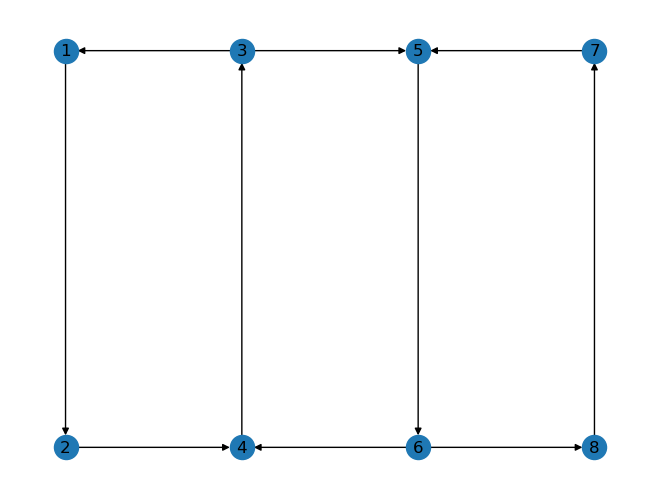

In [24]:
# Create an empty directed graph structure
G = nx.DiGraph()

# Adds multiple node to the graph G. We have a list containing 3 nodes i.e. nodes 1, 2 and 3 to be added to graph G
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])

# Adds edges betweeen nodes in the graph where directed edges from one node to the other are specified as a list of tuples
G.add_edges_from([(1, 2), (2, 4), (4, 3), (3, 5), (5, 6), (6, 8), (8, 7), (7, 5), (5, 6), (6, 4), (4, 3), (3, 1)])

# defines the position of each node
position = {1: (0, 1), 2: (0, 0), 3: (1, 1), 4: (1, 0), 5: (2, 1), 6: (2, 0), 7: (3, 1), 8: (3, 0)}
nx.draw(G, position, with_labels=True)

# Prodcues a visual of graph G where the with_labels parameter is specified as True so the nodes seen as labelled
nx.draw(G, position, with_labels=True)


In [52]:
adj = np.array([[0, 0, 1, 0, 0, 0, 0, 0],     
              [1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 0, 0]])  

print('adjacency matrix:')
print(adj)

adjacency matrix:
[[0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]]


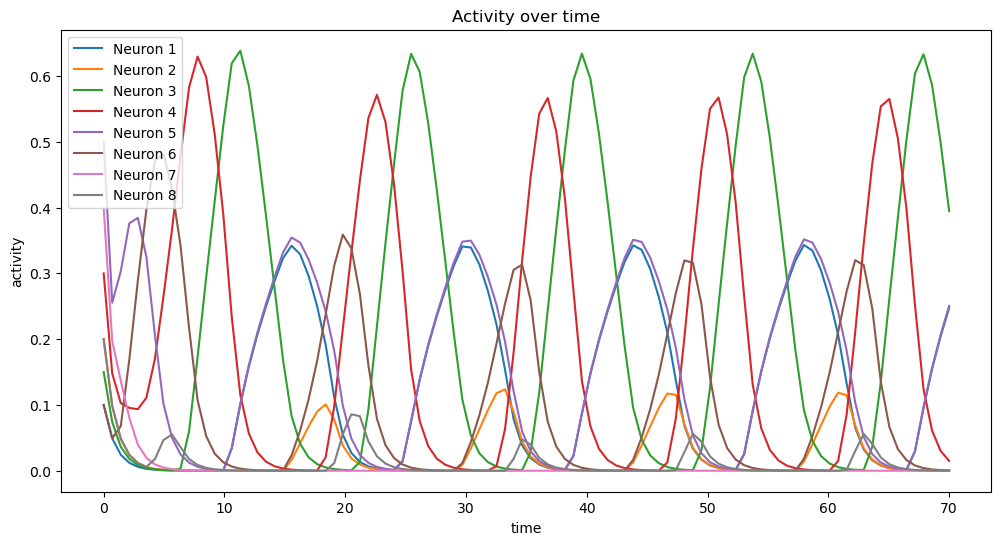

In [15]:
def dynamics(x, t, W, theta):
    """
    Computes the derivative of the vector of the dynamic variables, x, at timestep t
    
    Parameters
    ----------
    x: A vector of all dynamic variables at timestep t. Each dynamic variable represents the activity levels/firing rates 
    for a specific neuron within the network
    t: Current timestep
    W: The weight matrix representing the connectivity of the network
    theta: Constant applied to each neuron
    
    Returns
    ----------
    x_dot: The derivative of the vector of the dynamic variables, x at timestep t
    
    """
    
    # The code below models equation 1 described in the equation section of this notebook, representing the system of ODEs
    # in vector form. The threshold nonlinearity has been applied through the use of the np.maximum() function
    
    x_dot = -x + np.maximum(np.dot(W, x) + theta, 0)
    return x_dot

# Parameters theta, epsilon and delta. These have been chosen such to satisfy the inequality stated in the equations section
delta = 0.5 
epsilon = 0.25  
theta = 1

# The weights matrix describing the connectivity of the network.
W = np.array([[0, -1 - delta, -1 + epsilon, -1 - delta, -1 - delta, -1 - delta, -1 - delta, -1 - delta],   # Neuron 1
              [-1 + epsilon, 0, -1 - delta, -1 - delta,  -1 - delta,  -1 - delta, -1 - delta, -1 - delta], # Neuron 2
              [-1 - delta, -1 - delta, 0, -1 + epsilon, -1 - delta, -1 - delta, -1 - delta, -1 - delta],   # Neuron 3
              [-1 - delta, -1 + epsilon, -1 - delta, 0, -1 - delta, -1 + epsilon, -1 - delta, -1 - delta], # Neuron 4
              [-1 - delta, -1 - delta, -1 + epsilon, -1 - delta, 0, -1 - delta, -1 + epsilon, -1 - delta], # Neuron 5
              [-1 - delta, -1 - delta, -1 - delta, -1 - delta, -1 + epsilon, 0, -1 - delta, -1 - delta],   # Neuron 6
              [-1 - delta, -1 - delta, -1 - delta, -1 - delta, -1 - delta, -1 - delta, 0, -1 + epsilon],   # Neuron 7
              [-1 - delta, -1 - delta, -1 - delta, -1 - delta, -1 - delta, -1 + epsilon, -1 - delta, 0]])  # Neuron 8



# Defines the Initial Conditions
x0 = [0.1, 0.2, 0.15, 0.3, 0.5, 0.1, 0.4, 0.2]

# Creates an array of evenly spaced timesteps. Can be interpreted as seconds.
time = np.linspace(0, 70, 100)

# Solves the system of ODEs given by the dynamics function
solution = odeint(dynamics, x0, time, args=(W, theta))

# Plots the solutions
plt.figure(figsize=(12, 6))
plt.plot(time, solution[:, 0], label='Neuron 1')
plt.plot(time, solution[:, 1], label='Neuron 2')
plt.plot(time, solution[:, 2], label='Neuron 3')
plt.plot(time, solution[:, 3], label='Neuron 4')
plt.plot(time, solution[:, 4], label='Neuron 5')
plt.plot(time, solution[:, 5], label='Neuron 6')
plt.plot(time, solution[:, 6], label='Neuron 7')
plt.plot(time, solution[:, 7], label='Neuron 8')
plt.xlabel('time')
plt.ylabel('activity')
plt.legend()
plt.title('Activity over time')
plt.show()

For the above 8-neuron network, many neurons exhibit a limit cycle. The neurons appear to display transcient dynamics where the neuron activity levels change before settling into their respective limit cycles.

The activity of Neuron 1 and Neuron 5 are synchronous. They have similar frequency, amplitude and time intervals at which their activities peak and trough. 

There again seems to be a sequenctial firing of neurons for Neurons, with the combination of Neuron 1 and Neuron 5 activity levels increasing then decaying, followed by Neuron 6, Neuron 4 and Neuron 3 respectively.  This is further reinformced when considering Neuron 3 peaks while Neuron 4 is about to reach a minimum, Neuron 4 peaks, when Neuron 6 is about to reach a minimum and Neuron 6 peaks when the combination of Neuron 1 and Neuron 5 is about to reach a minimum.



The activities of the different neurons in this 8-neuron neural network shows the emergence of a complex rhythm with some neurons being synchronous in their activation and others sequential. This differs from the 2nd 3-neuron neural network where there was only sequential activation of neurons

***Morrison, K. et al. (2016) 'Diversity of emergent dynamics in competitive threshold-linear networks: a preliminary report,' arXiv (Cornell University) [Preprint]. http://export.arxiv.org/pdf/1605.04463.***

## Conclusion

CTLN networks can exhibit complex, non-linear dynamics whose dynamics are also sensitive to parameters $\theta, \delta$ and $\epsilon$ as well as initial conditions. Parameters can influence amplitude, frequency and phase of neuron activities in limit cycles and initial conditions can determine how soon a network reaches a steady limit cycle.

If given more time and resources, I would experiment with various network sizes and various different initial conditions and parameter settings to potentially discover other interesting dynamic behaviours.

The links of CTLN's to Data Science and my workplace can include the modelling of chemical reactions and the identification of their steady states in Unilever's supply chain.